### Neshyba 2023


# Blackbody spectra

## Introduction

We've already considered one form of Planck's blackbody radiance formula,

$$
B_\nu = {2 h \nu^3 \over c^2}{ 1 \over exp({h\nu \over k_B T})-1} \ \ \ \ (1)
$$

where $\nu$ is the frequency of light emitted by a body. Another form (analogous to $I2.4$ in Shepherd & Grushow) is

$$
B_\lambda = {2 h c^2 \over \lambda^5}{ 1 \over exp({h c \over \lambda k_B T})-1} \ \ \ \ (2)
$$

in which $\lambda$ is the wavelength of the light. Eqs. 1 and 2 look different, but they really convey the same information. That's because (as you may recall from previous coursework) the frequency and wavelength of light are related quantities:

$$
\lambda = {c \over \nu} \ \ \ \ (3)
$$

where $c$ is the speed of light. 

The mathematical derivation of Eqs. 1 and 2 was key in the development of quantum mechanics. That derivation will not concern us here, however: our goal is primarily to get used to the properties and uses of blackbody radiance, especially as a function of the wavelength $\lambda$ of the light emitted -- what is commonly referred to as a *spectrum*. Why? 

One reason to be interested in these formulas is really practical. To understand that, consider an example from real life, light emitted by the surface of the sun. In particular, the sun appears more or less yellow to human eyes, but careful (instrumental) analysis of the wavelength dependence of this emitted light turns out to have th properties shown the figure below:

<p style='text-align: center;'>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/EffectiveTemperature_300dpi_e.png/1920px-EffectiveTemperature_300dpi_e.png" height="500" width="500"/>
<strong>Figure 1</strong>. Spectrum of the sun, from https://en.wikipedia.org/wiki/Planck%27s_law.
</p>

One obvious property here is that there's a distinctive *wavelength of maximum emission*, which we'll refer to as $\lambda_{max}$. For example, from the figure above we can see that the sun's $\lambda_{max} \approx 500 \ nm$, which corresponds to green light! 

It turns out that other stars emit light in such a way that their $\lambda_{max}$ is different from that of the sun, in a way the tells us about the temperature of those stars. Specifically, stars that are hotter than the sun have a $\lambda_{max}$ value less than that of the sun, and appear a shade more blue, while stars that are cooler than the sun have a $\lambda_{max}$ value greater than that of the sun, and appear a shade more red.


### Learning goals
The main learning goals of this exercise are 
1. I can create Python functions.
1. I can create arrays of numbers using numpy's linspace function.
1. I can use the label/legend method to keep track of multiple curves drawn on the same graph.
1. I can explain what $\lambda_{max}$ is, and infer its value from an emission spectrum.
1. I can describe how $\lambda_{max}$ is used to infer whether the temperature of a star is greater than, or less than, that of the sun.

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry(system='atomic').Quantity
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

### Constants
Below we specify some constants, in atomic units. We also define two temperatures -- one ($T_1=5777 \ K$) corresponding to the surface of the sun, and off Arcturus ($T_2=4290 \ K$ -- see https://en.wikipedia.org/wiki/Arcturus).

In [2]:
hbar = AssignQuantity(1,'atomic_unit_of_time * hartree'); print(hbar)
h = hbar*2*np.pi; print(h)
c = AssignQuantity(137.036,'bohr / atomic_unit_of_time'); print(c)
kB = AssignQuantity(3.166811e-6, 'hartree / K'); print(kB)

# Specify temperatures of the sun and of Arcturus
T1 = AssignQuantity(5777, 'K')
T2 = AssignQuantity(4290, 'K')

1 atomic_unit_of_time * hartree
6.283185307179586 atomic_unit_of_time * hartree
137.036 bohr / atomic_unit_of_time
3.166811e-06 hartree / kelvin


### Functions in Python
Below, we reproduce the frequency-dependent blackbody radiation function we looked at previously, based on Eq. 1 of the Introduction.

In [3]:
def B_nu(nu,T,h,c,kB):
    "Planck blackbody radiance as a function of frequency of light"
    term1 = 2 * h * nu**3  / c**2
    term2 = h*nu/(kB*T)
    term3 = np.exp(term2)-1
    return term1/term3

### Creating blackbody spectra as a function of frequency
Before, we used this function to evaluate radiance at a single frequency -- but we would *really* like to use it for a *range* of frequencies. In the cell below, we lay out an array of frequencies in nanometers, then convert to atomic units, then employ $B_\nu$. We do this twice, actually: for our sun, and for the star Arcturus. Also, note that we're using the label/legend method to keep track of which curve is which.

<IPython.core.display.Javascript object>


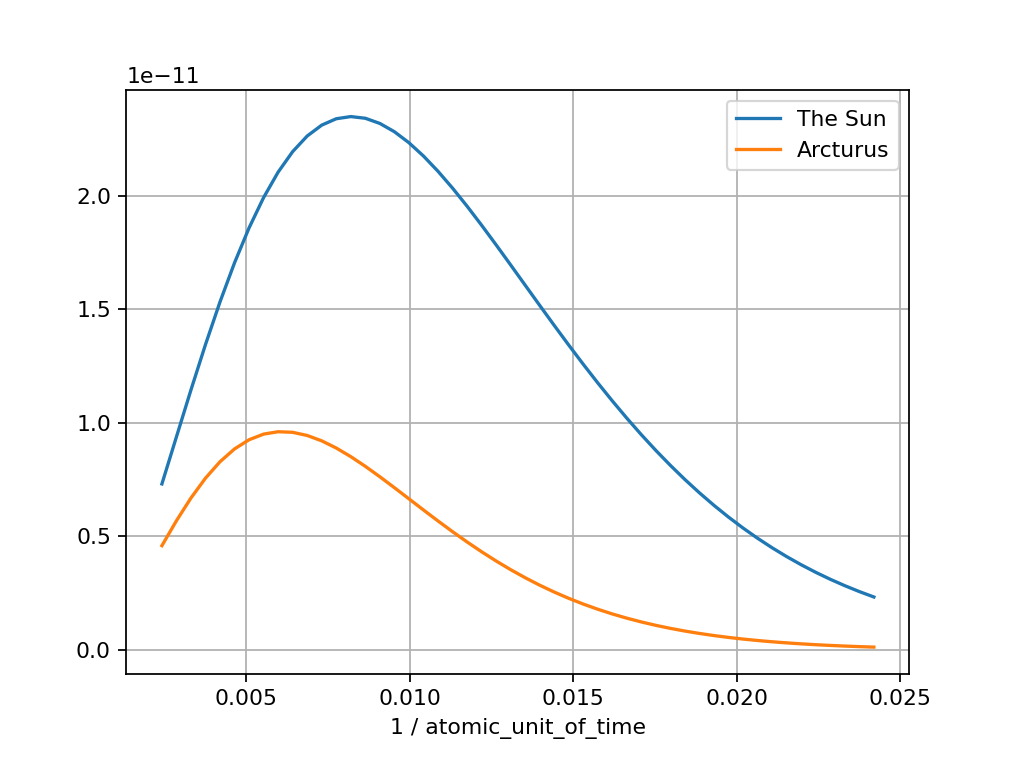

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [4]:
# Specify a range of frequencies
nu = AssignQuantity(np.linspace(1e14,1e15),'s^-1')
nu.ito('1/atomic_unit_of_time')

# Specify temperatures and calculate the blackbody spectra
B_nu_T1 = B_nu(nu,T1,h,c,kB)

# Specify temperatures and calculate the blackbody spectra
B_nu_T2 = B_nu(nu,T2,h,c,kB)

# Have a look graphically
plt.figure()
plt.plot(nu,B_nu_T1,label="The Sun")
plt.plot(nu,B_nu_T2,label="Arcturus")
plt.legend()
plt.xlabel(str(nu.units))
plt.grid(True)

### Pause for analysis
You'll notice that the effect of lower temperature in these spectra is to shift the peak to the left (i.e., a lower frequency). That understanding will come in handy later.

### Defining the blackbody radiance as a function of *wavelength* (instead of frequency)
In the cell below, create a function $B_\lambda$ that takes the same arguments as $B_\nu$, except that it is supplied with the light's wavelength instead of its frequency, according to Eq. (2) in the Introduction. The first line should look like this:

    def B_lamb(lamb,T,h,c,kB):

In [5]:
### BEGIN SOLUTION
def B_lamb(lamb,T,h,c,kB):
    "Planck blackbody radiance as a function of wavelength of light"
    term1 = 2 * h * c**2  / lamb**5
    term2 = h*c/(lamb*kB*T)
    term3 = np.exp(term2)-1
    return term1/term3
### END SOLUTION

### Creating blackbody spectra as a function of wavelength
Now we want to look at blackbody spectra as a function of the wavelength of light. Do that below, using numpy's linspace to generate an array of wavelengths ranging from 1 to 2000 nanometers. Two spectra, actually: one for our sun, and another for the star Arcturus. Other notes:

1. Make this an entirely atomic unit calculation. That means you need to convert wavelengths to bohr  before calling $B_\lambda$. 
1. When plotting, use the label/legend method to keep track of which curve is which, and

/usr/lib/python3.10/site-packages/pint/numpy_func.py:303: RuntimeWarning: overflow encountered in exp
  result_magnitude = func(*stripped_args, **stripped_kwargs)


<IPython.core.display.Javascript object>


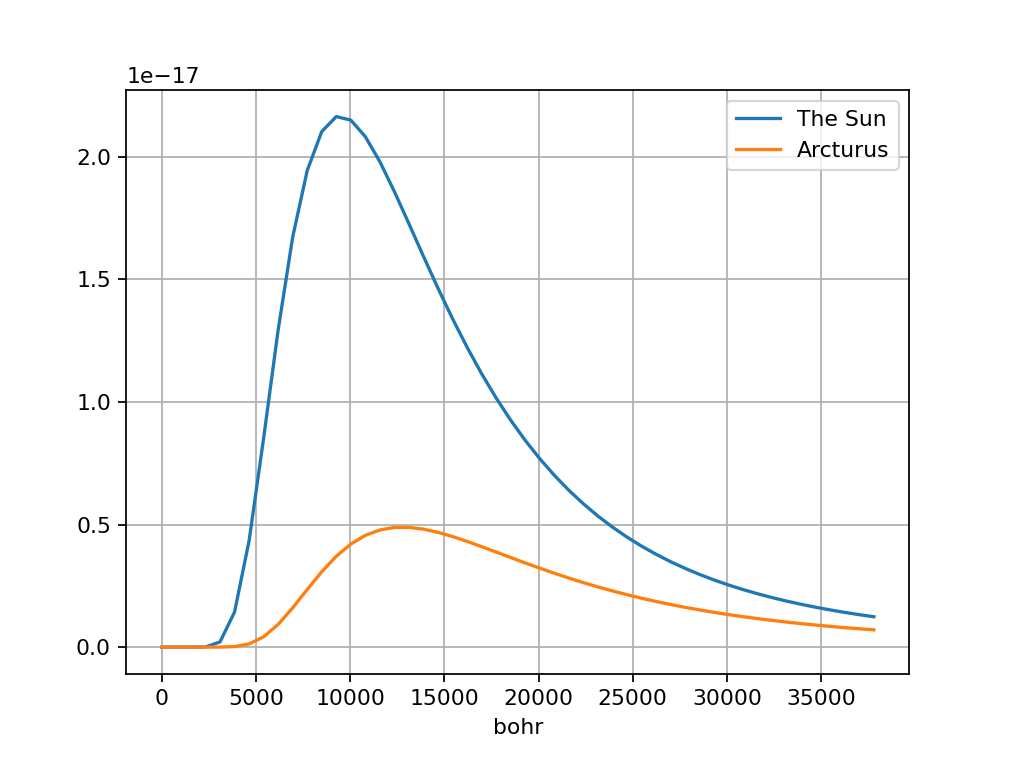

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [6]:
# Specify a range of wavelengths from 1 to 2000 nanometers (call the variable "wavelength")
### BEGIN SOLUTION
wavelength = np.linspace(1,2000)
wavelength = AssignQuantity(wavelength,'nanometers')
wavelength.ito('bohr')
### END SOLUTION

# Calculate the blackbody spectrum of the sun
### BEGIN SOLUTION
B_lamb_T1 = B_lamb(wavelength,T1,h,c,kB)
### END SOLUTION

# Calculate the blackbody spectrum of Arcturus
### BEGIN SOLUTION
B_lamb_T2 = B_lamb(wavelength,T2,h,c,kB)
### END SOLUTION

# Have a look graphically
### BEGIN SOLUTION
plt.figure()
plt.plot(wavelength,B_lamb_T1,label="The Sun")
plt.plot(wavelength,B_lamb_T2,label="Arcturus")
plt.legend()
plt.xlabel(str(wavelength.units))
plt.grid(True)
### END SOLUTION

### Pause for analysis
You'll notice that the temperature dependence evident in this spectrum is opposite to what we noticed before, in the sense that lower temperatures shift the wavelength of maximum emission to the *right*. Hopefully, this makes qualitative sense to you, since, according to Eq. (3) in the Introduction, smaller $\nu$ (frequency) corresponds to larger $\lambda$ (wavelength).

Given that, and defining $\lambda_{max}$ as the wavelength of maximum emission, which of the following would be consistent the above observation? Assume $b$ is a constant.

1. $\lambda_{max} \approx b T$
1. $\lambda_{max} \approx {b \over T}$

### BEGIN SOLUTION
$\lambda_{max} \approx {b \over T}$
### END SOLUTION

### Graphing with nanometers on the x-axis
The code below makes the same graph you just made, but with the x-axis converted to nanometers. This cell assumes you've named your wavelength variable "wavelength"; if not, then you'll need to make an adjustment.

<IPython.core.display.Javascript object>


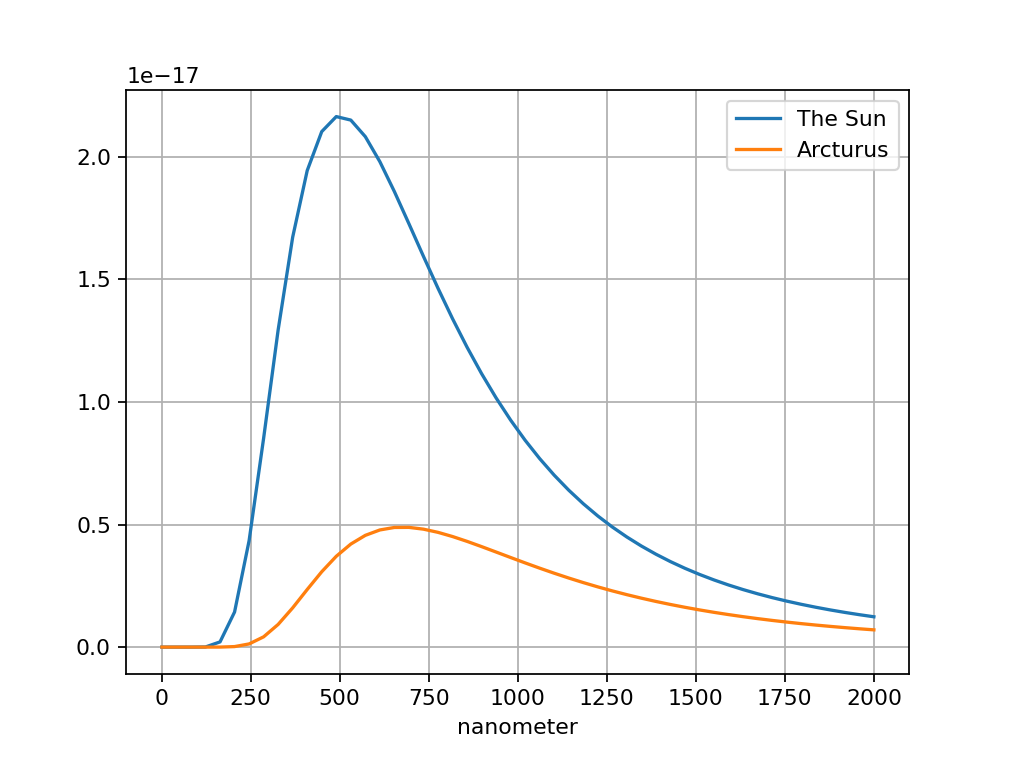

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [7]:
plt.figure()
wavelength_in_nm = wavelength.to('nm')
plt.plot(wavelength_in_nm,B_lamb_T1,label="The Sun")
plt.plot(wavelength_in_nm,B_lamb_T2,label="Arcturus")
plt.legend()
plt.xlabel(str(wavelength_in_nm.units))
plt.grid(True)

### Pause for analysis

Here's a spectrum of the light emitted by the star Sirius, from https://stargazerslounge.com/uploads/monthly_01_2014/post-4419-0-35438900-1390169441.jpg:

<p style='text-align: center;'>
<img src="https://stargazerslounge.com/uploads/monthly_01_2014/post-4419-0-35438900-1390169441.jpg" height="600" width="600"/>

Note that the wavelength on the horizontal axis is in Angstroms, which is 1/10 a nanometer; therefore the wavelength of peak emission is $\lambda_{max} \approx 4800 \ Angstroms = 480 \ nm$. That $\lambda_{max}$ is comprised of blue-green light -- and to some observers, Sirius really does look a little more blue than other stars.
    
Based on what you know about the relationship between $\lambda_{max}$ and the temperature of a blackbody emitter, would you suppose Sirius is colder than the sun, or warmer (and why)?

### BEGIN SOLUTION
Since the wavelength of maximum emission from Sirius ($\lambda_{max}\approx 480 \ nm$) is smaller than that of the sun ($\lambda_{max}\approx 500 \ nm$), Sirius must be hotter than the sun.
### END SOLUTION

### Refreshing and saving your code
1. Use the dropdown menu Kernel/Restart
2. Use the dropdown menu Cell/Run All Above
3. Under the "File" dropdown menu item in the upper left is a disk icon. Press it now to save your work (you can, do this at any time as you're working on an assignment, actually).

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Finishing up
Assuming all this has gone smoothly, carry out three more steps (but read this carefully before starting):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page